In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, model_selection
from joblib import dump, load
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import gc
import pickle


pd.set_option('display.max_columns', None)

# Load data

In [2]:
#df = pd.read_csv('clean_data1.csv')
df = pd.read_csv('clean_data2.csv')

df = df.drop("CODE_GENDER_M", axis = 1)

In [3]:
df.shape

(122761, 52)

Proportion of accepted and rejected proposal

In [4]:
df["TARGET"].value_counts(normalize=True)*100

0    90.499426
1     9.500574
Name: TARGET, dtype: float64

In [5]:
for col in ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "CREDIT_MEAN_OVERDUE_active", 
 "CREDIT_MEAN_active", "CREDIT_MEAN_OVERDUE_sold", "CREDIT_MEAN_sold",
"CREDIT_MEAN_OVERDUE_closed", "CREDIT_MEAN_closed", "CREDIT_ask"]:
    df[col] = np.log10(df[col]+1)

In [6]:
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_sold,CREDIT_MEAN_OVERDUE_sold,CREDIT_MEAN_sold,proportion_OVERDUE_sold,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,CREDIT_bad,CREDIT_MEAN_OVERDUE_bad,CREDIT_MEAN_bad,proportion_OVERDUE_bad,CREDIT_ask,Number_years_Loan_Theorical,INCOME_ANNUITY_RATIO
0,100002,1,5.306427,4.392723,25.956104,1.747599,0.0,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.653213,0.000000,0.0,0.0,0.0,0.0,1.0,3.320595,4.884310,0.027295,0.0,0.0,0.0,0.0,5.252989,16.461104,8.198215
1,100008,0,4.995640,4.439625,46.477366,4.356653,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.427497,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.001823,0.000000,0.0,0.0,0.0,0.0,5.211571,17.824857,3.597711
2,100009,0,5.232999,4.615971,37.799726,8.587106,17.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.000000,5.690357,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.060920,0.000000,0.0,0.0,0.0,0.0,4.845957,37.789061,4.140336
3,100014,0,5.051156,4.325885,27.975309,1.862826,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,3.804626,5.701461,0.012679,0.0,0.0,0.0,0.0,1.0,3.380656,5.217056,0.014569,0.0,0.0,0.0,0.0,5.012141,30.811730,5.312367
4,100016,0,4.829310,3.769562,36.869684,7.454047,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.0,0.000000,4.925262,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,4.663479,0.000000,0.0,0.0,0.0,0.0,5.026216,13.749044,11.476664


In [7]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE" or column[:4] == "FLAG":
        cat.append(column)
    else:
        col.append(column)

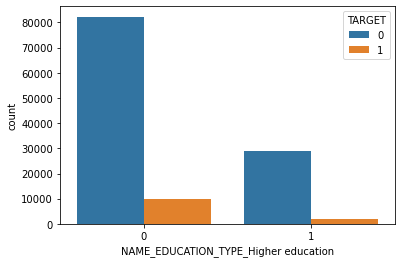

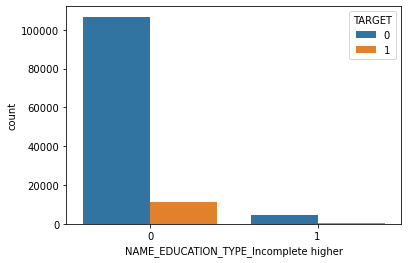

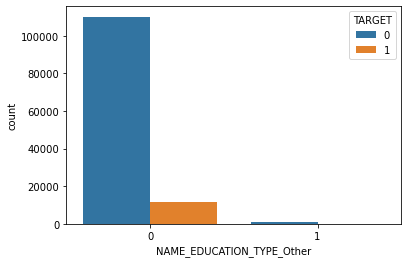

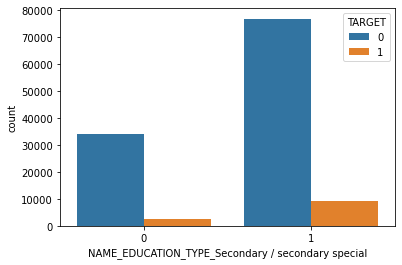

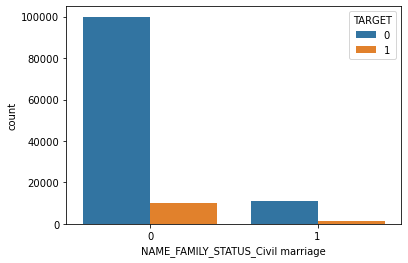

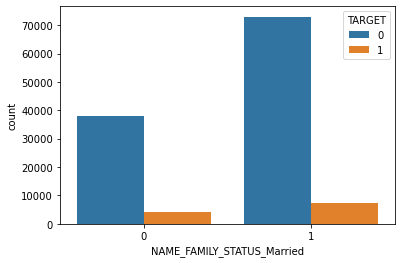

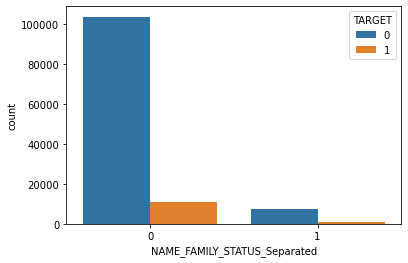

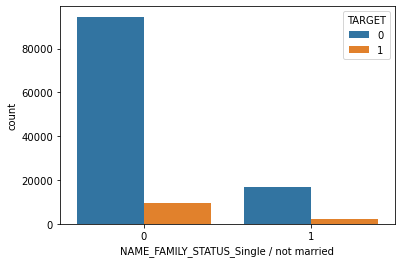

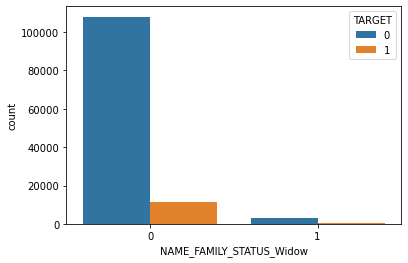

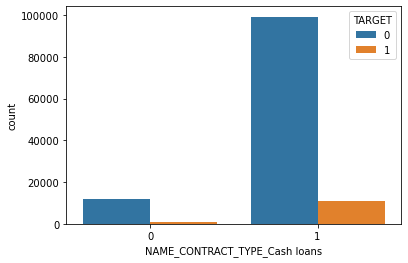

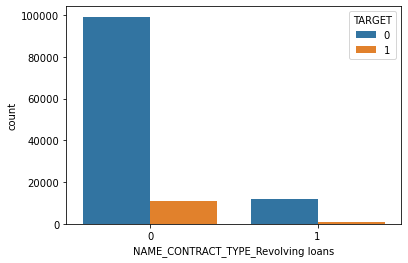

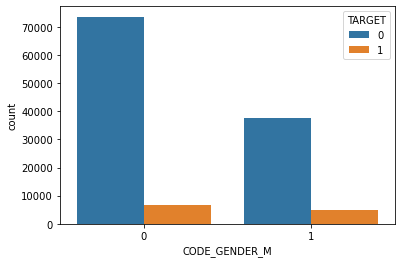

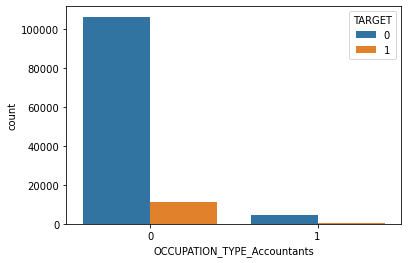

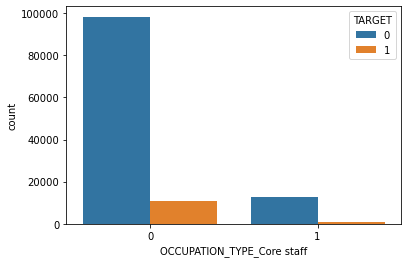

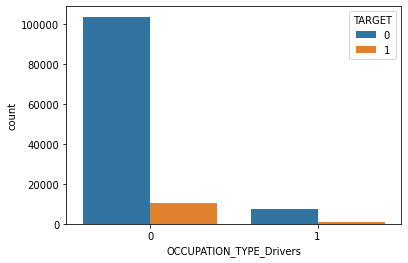

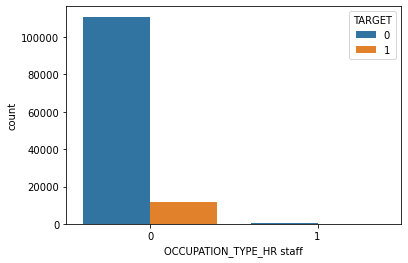

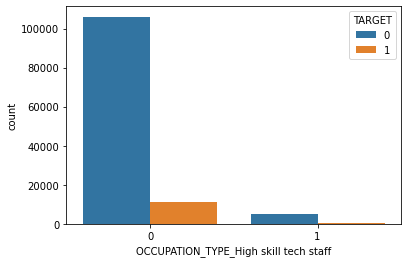

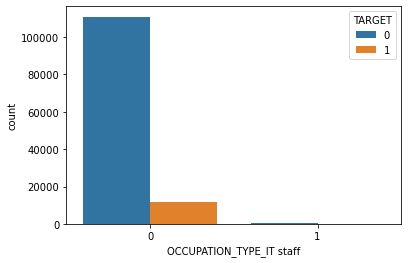

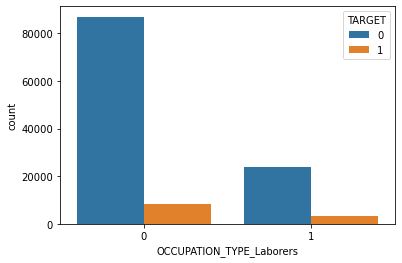

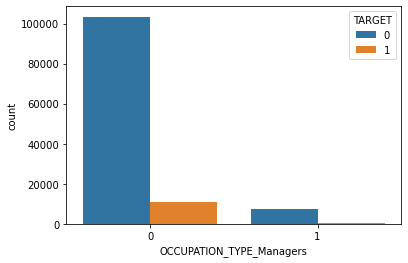

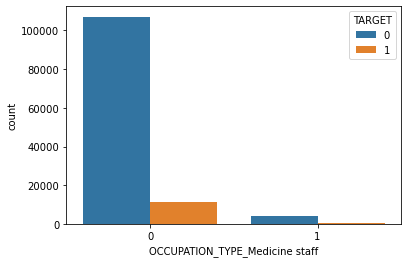

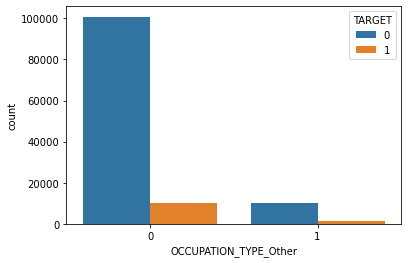

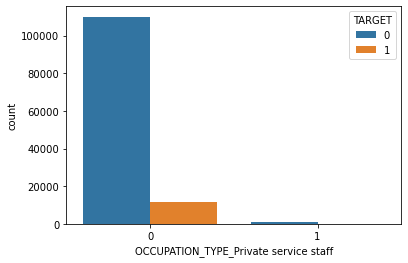

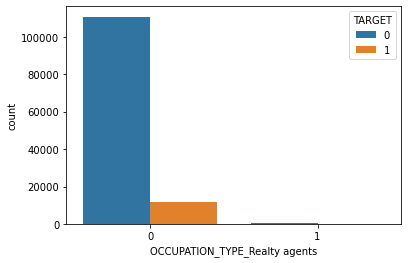

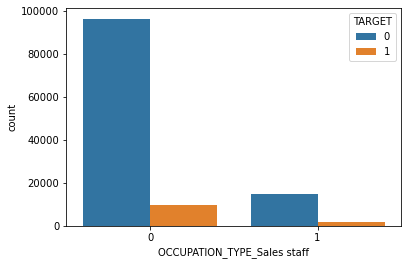

In [8]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

C:\Users\jayse\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


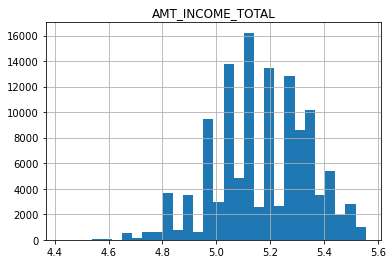

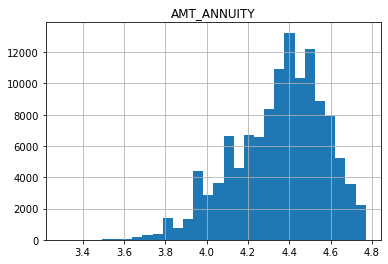

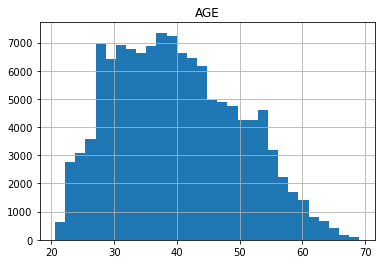

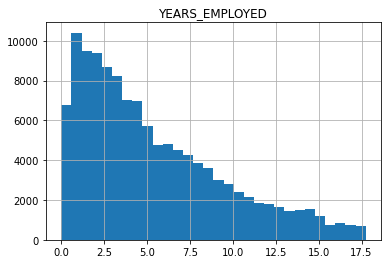

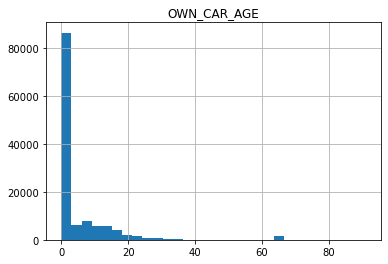

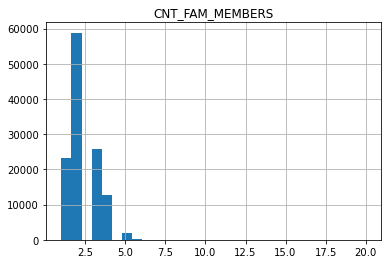

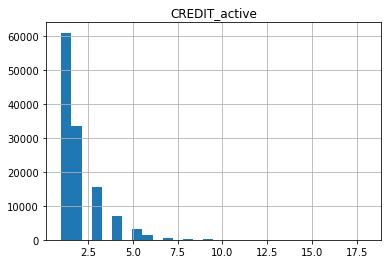

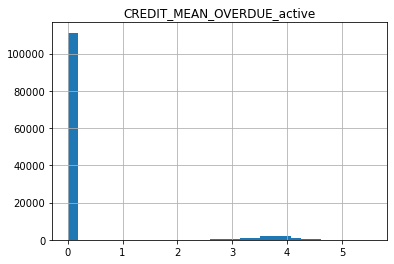

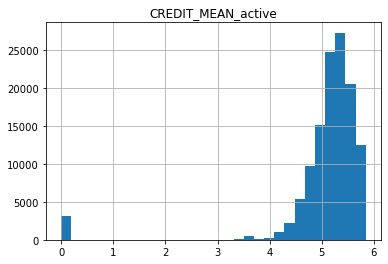

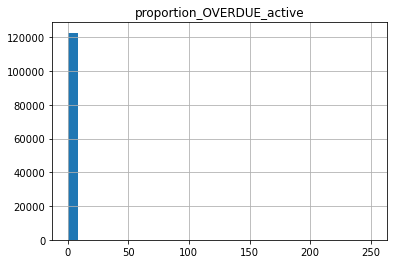

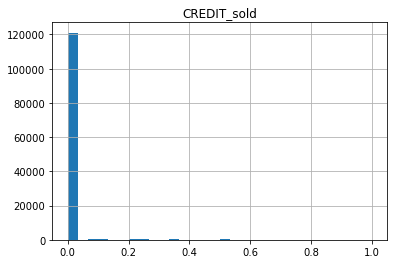

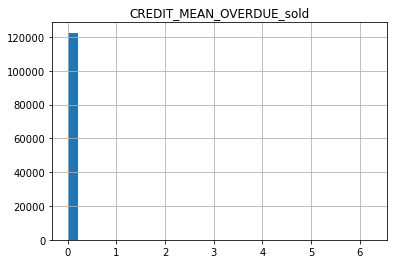

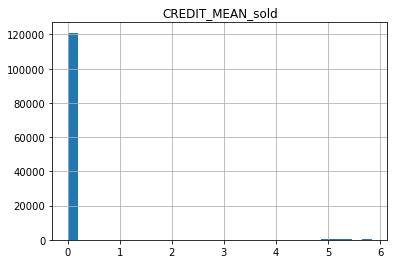

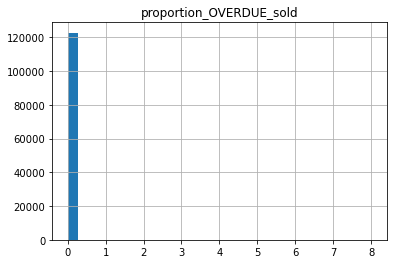

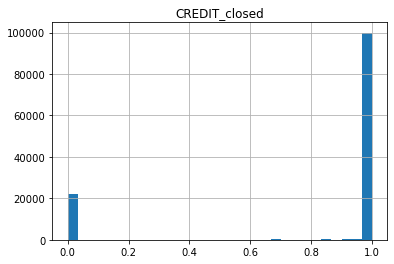

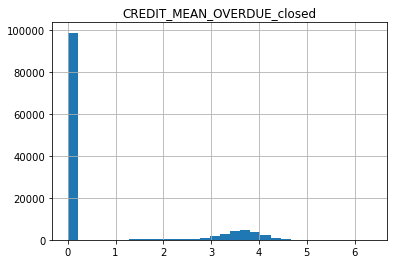

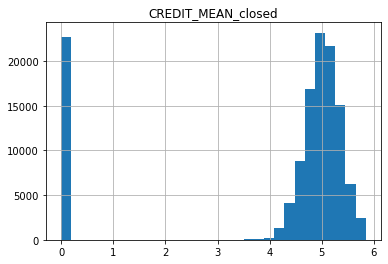

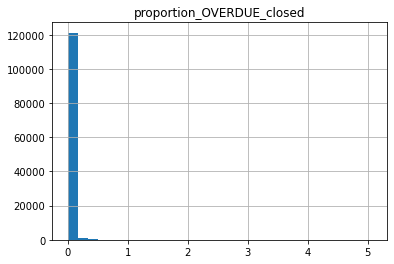

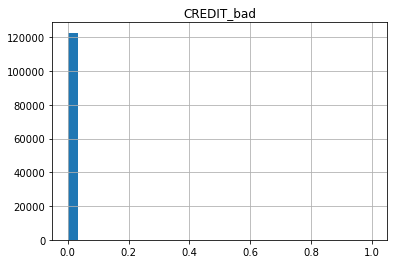

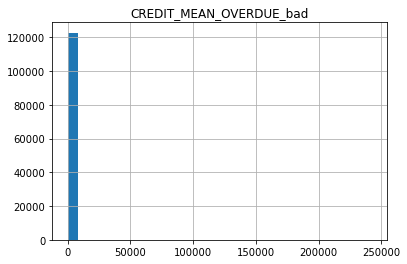

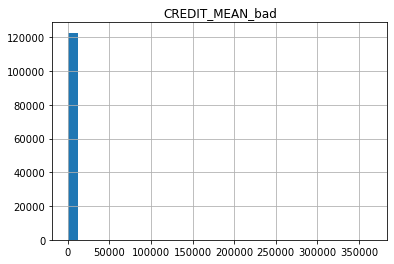

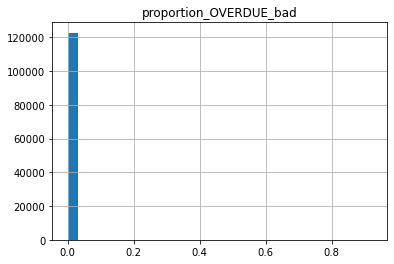

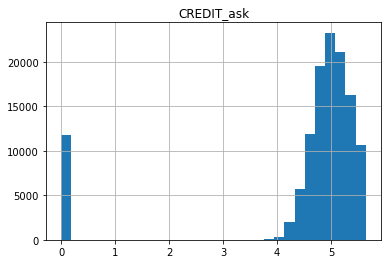

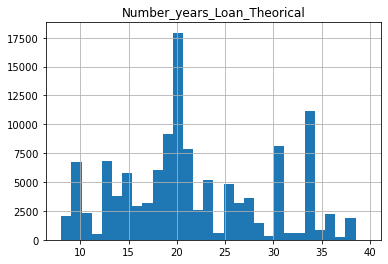

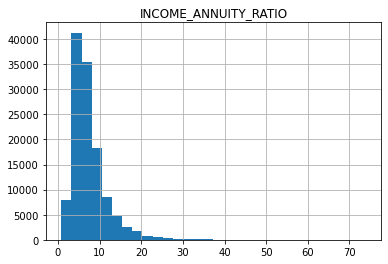

In [9]:
for i in range(len(col)):
    data.hist(col[i], bins = 30)

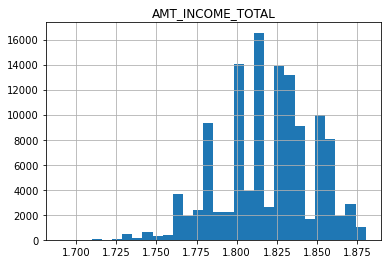

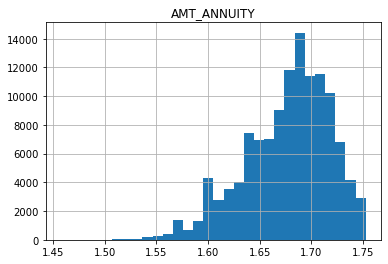

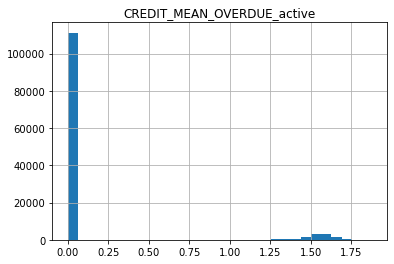

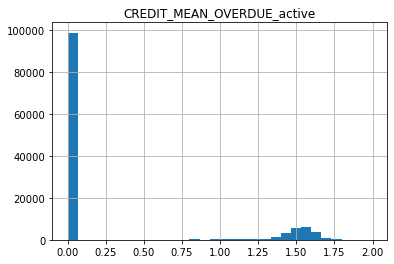

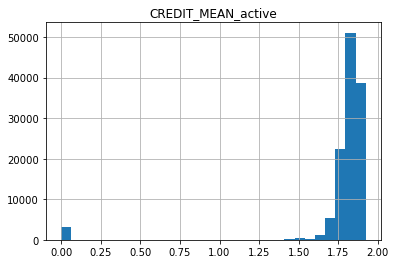

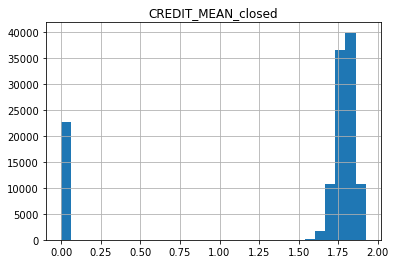

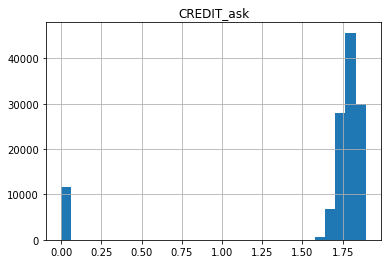

In [10]:
#apply log to flat distribution
np.log(data["AMT_INCOME_TOTAL"]+1).hist(bins = 30)
plt.title("AMT_INCOME_TOTAL")
plt.show()
np.log(data["AMT_ANNUITY"]+1).hist(bins = 30)
plt.title("AMT_ANNUITY")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_active")
plt.show()
np.log(data["CREDIT_MEAN_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_closed")
plt.show()
np.log(data["CREDIT_ask"]+1).hist(bins = 30)
plt.title("CREDIT_ask")
plt.show()

# Correlation matrix

<AxesSubplot:>

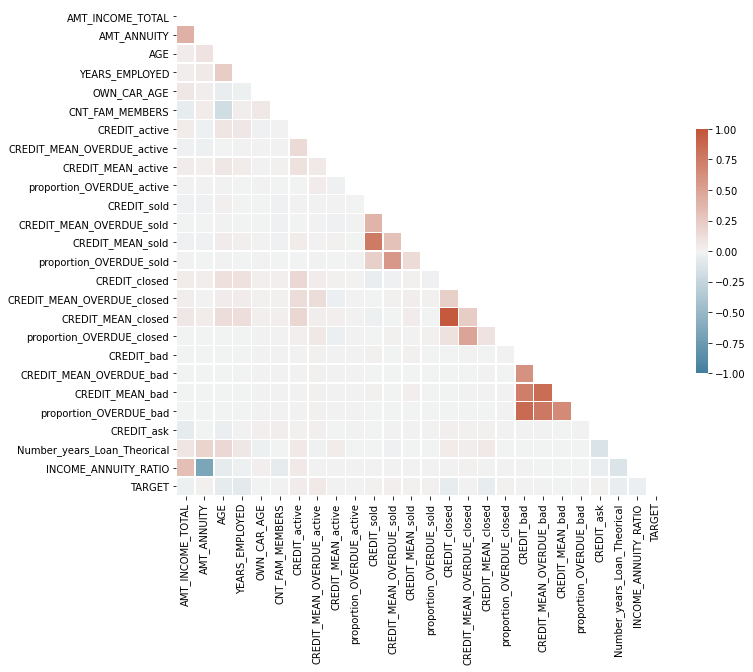

In [11]:
col.append("TARGET")
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising.
TARGET seem not correlated with other features...

# Candidat's sex

In [12]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.66/0.34'

In [13]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.58/0.42'

To avoid any bias due to candidat's sex, **"CODE_GENDER_M"** is removed.

In [14]:
df = df.drop("CODE_GENDER_M", axis = 1)
target = df[["TARGET"]]
data = df.iloc[:,2:]

# Education type

In [15]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [16]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Higher education                 1898
NAME_EDUCATION_TYPE_Incomplete higher                 454
NAME_EDUCATION_TYPE_Other                             158
NAME_EDUCATION_TYPE_Secondary / secondary special    9153
dtype: int64

<AxesSubplot:ylabel='None'>

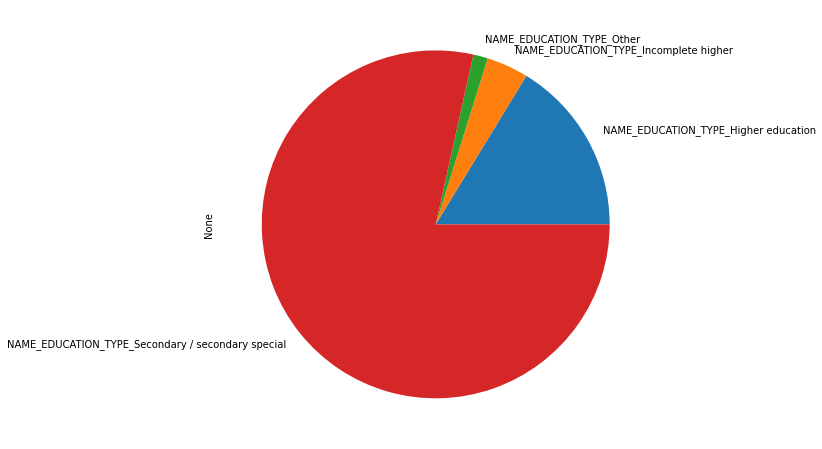

In [17]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [18]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Higher education                 28887
NAME_EDUCATION_TYPE_Incomplete higher                 4372
NAME_EDUCATION_TYPE_Other                             1011
NAME_EDUCATION_TYPE_Secondary / secondary special    76828
dtype: int64

<AxesSubplot:ylabel='None'>

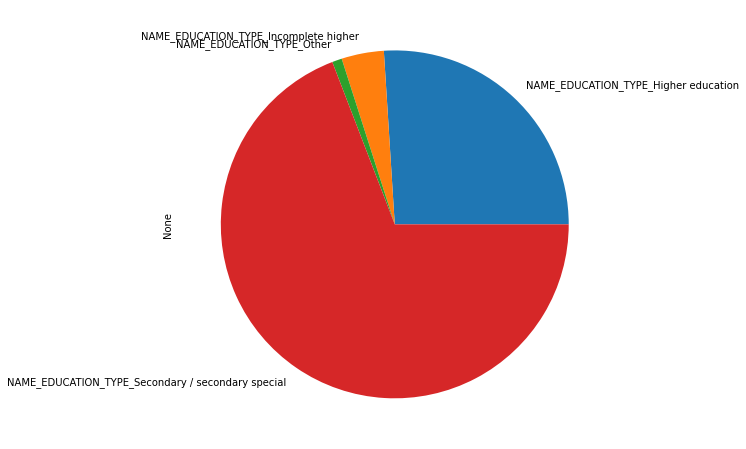

In [19]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [20]:
len("NAME_FAMILY_STATUS")

18

In [21]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [22]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage          1386
NAME_FAMILY_STATUS_Married                 7319
NAME_FAMILY_STATUS_Separated                732
NAME_FAMILY_STATUS_Single / not married    2006
NAME_FAMILY_STATUS_Widow                    220
dtype: int64

<AxesSubplot:ylabel='None'>

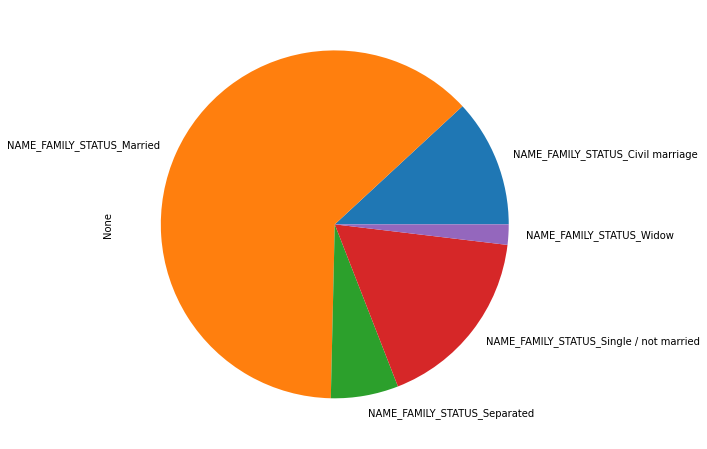

In [23]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [24]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage          11138
NAME_FAMILY_STATUS_Married                 72930
NAME_FAMILY_STATUS_Separated                7304
NAME_FAMILY_STATUS_Single / not married    16607
NAME_FAMILY_STATUS_Widow                    3119
dtype: int64

<AxesSubplot:ylabel='None'>

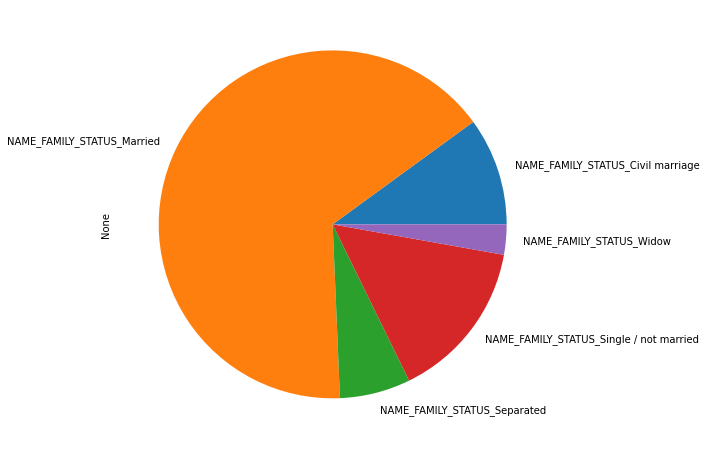

In [25]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Occupation type

In [26]:
len("OCCUPATION_TYPE")

15

In [27]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [28]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               262
OCCUPATION_TYPE_Core staff                987
OCCUPATION_TYPE_Drivers                  1018
OCCUPATION_TYPE_HR staff                   19
OCCUPATION_TYPE_High skill tech staff     372
OCCUPATION_TYPE_IT staff                   16
OCCUPATION_TYPE_Laborers                 3124
OCCUPATION_TYPE_Managers                  558
OCCUPATION_TYPE_Medicine staff            348
OCCUPATION_TYPE_Other                    1316
OCCUPATION_TYPE_Private service staff      78
OCCUPATION_TYPE_Realty agents              27
OCCUPATION_TYPE_Sales staff              1722
dtype: int64

In [29]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               4587
OCCUPATION_TYPE_Core staff               12855
OCCUPATION_TYPE_Drivers                   7399
OCCUPATION_TYPE_HR staff                   251
OCCUPATION_TYPE_High skill tech staff     5084
OCCUPATION_TYPE_IT staff                   219
OCCUPATION_TYPE_Laborers                 24100
OCCUPATION_TYPE_Managers                  7686
OCCUPATION_TYPE_Medicine staff            4058
OCCUPATION_TYPE_Other                    10323
OCCUPATION_TYPE_Private service staff     1120
OCCUPATION_TYPE_Realty agents              337
OCCUPATION_TYPE_Sales staff              14661
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

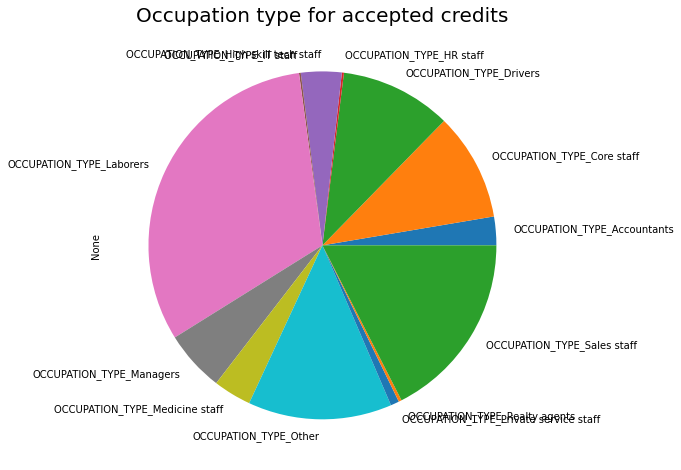

In [30]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

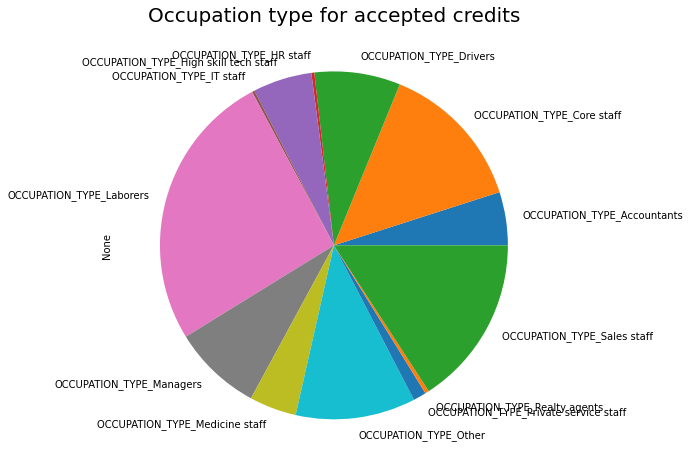

In [31]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [32]:
def score_regression(y_test, y_pred, verbose = True):
    """
    Evaluate prediction by computing sensibility,
    specificity, precision, accurary and F-mesure
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    score["sensibility"] = tp/(tp+fn)
    score["specificity"] = tn/(fp+tn)
    if tp+fp == 0:
        score["precision"] = 0
    else:
        score["precision"] = tp/(tp+fp)
    score["accuracy"] = (tp+tn)/(tn+fn+tp+fp)
    if score["sensibility"] + score["precision"] == 0:
        score["f_mesure"] = 0
    else:
        score["f_mesure"] = 2 * (score["precision"] * score["sensibility"]
        )/(score["sensibility"] + score["precision"])
    if verbose:
        print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
        print("Sensibility (rate of true positif) {0}".format(score["sensibility"]))
        print("Specificity (rate of true negatif) {0:.3f}".format(score["specificity"]))
        if score["precision"] == 0:
            print("Denominator is zero. impossible to compute precision ! Change ratio True and False")
        else:
            print("Precision (proportion of correct prediction of positif) {0:.3f}".format(score["precision"]))
        print("Accurary (proportion of correct prediction) {0:.3f}".format(score["accuracy"]))
        if score["f_mesure"] == 0:
            print("Denominator is zero. impossible to compute F-mesure ! Change ratio True and False\n")
        else:
            print("F-mesure {0:.3f}\n".format(score["f_mesure"]))
    return score

In [33]:
def process_logisitic_reg(X, Y, n_split = 5, display = True, class_weight = 'balanced'):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = None, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression(C=10, max_iter = 100000, multi_class = 'ovr', class_weight = 'balanced').fit(X_train, np.ravel(y_train))
        y_pred = lr.predict(X_test)
        mdl.append(lr)
        scores.append(score_regression(y_test, y_pred, display))
    return mdl, scores

In [34]:
def process_random_model(X, Y, n_split = 5, display = True):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = None, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rng = np.random.default_rng()
        y_pred = rng.integers(low = 0, high = 1, size=len(y_test), endpoint=True)
        scores.append(score_regression(y_test, y_pred, display))
    return scores

## Random model

In [35]:
#rng = np.random.default_rng()
#rng.integers(low = 0, high = 1, size=10, endpoint=True)
process_random_model(data.copy().to_numpy(), target.copy().to_numpy())

TN: 11140.0, FP: 11080.0, FN: 1167.0, TP: 1166.0
Sensibility (rate of true positif) 0.4997856836690956
Specificity (rate of true negatif) 0.501
Precision (proportion of correct prediction of positif) 0.095
Accurary (proportion of correct prediction) 0.501
F-mesure 0.160

TN: 11117.0, FP: 11102.0, FN: 1128.0, TP: 1205.0
Sensibility (rate of true positif) 0.5165023574796399
Specificity (rate of true negatif) 0.500
Precision (proportion of correct prediction of positif) 0.098
Accurary (proportion of correct prediction) 0.502
F-mesure 0.165

TN: 11037.0, FP: 11182.0, FN: 1142.0, TP: 1191.0
Sensibility (rate of true positif) 0.5105015002143163
Specificity (rate of true negatif) 0.497
Precision (proportion of correct prediction of positif) 0.096
Accurary (proportion of correct prediction) 0.498
F-mesure 0.162

TN: 11071.0, FP: 11149.0, FN: 1165.0, TP: 1167.0
Sensibility (rate of true positif) 0.5004288164665524
Specificity (rate of true negatif) 0.498
Precision (proportion of correct predict

[{'sensibility': 0.4997856836690956,
  'specificity': 0.5013501350135013,
  'precision': 0.09521476400457292,
  'accuracy': 0.5012014825072293,
  'f_mesure': 0.15995610124151174},
 {'sensibility': 0.5165023574796399,
  'specificity': 0.5003375489445969,
  'precision': 0.09791175753636142,
  'accuracy': 0.5018735744542197,
  'f_mesure': 0.16461748633879783},
 {'sensibility': 0.5105015002143163,
  'specificity': 0.496737026868896,
  'precision': 0.09625798108785258,
  'accuracy': 0.4980449657869013,
  'f_mesure': 0.16197470420236637},
 {'sensibility': 0.5004288164665524,
  'specificity': 0.4982448244824482,
  'precision': 0.09475479051640143,
  'accuracy': 0.4984522645812968,
  'f_mesure': 0.1593391589295467},
 {'sensibility': 0.5008576329331046,
  'specificity': 0.5017101710171017,
  'precision': 0.09542483660130718,
  'accuracy': 0.5016291951775823,
  'f_mesure': 0.16030743892396376}]

In [36]:
mdl, scores = process_logisitic_reg(data.copy().to_numpy(), target.copy().to_numpy(), class_weight = None)

TN: 13037.0, FP: 9183.0, FN: 907.0, TP: 1426.0
Sensibility (rate of true positif) 0.6112301757393913
Specificity (rate of true negatif) 0.587
Precision (proportion of correct prediction of positif) 0.134
Accurary (proportion of correct prediction) 0.589
F-mesure 0.220

TN: 13276.0, FP: 8943.0, FN: 896.0, TP: 1437.0
Sensibility (rate of true positif) 0.6159451350192885
Specificity (rate of true negatif) 0.598
Precision (proportion of correct prediction of positif) 0.138
Accurary (proportion of correct prediction) 0.599
F-mesure 0.226

TN: 13162.0, FP: 9057.0, FN: 881.0, TP: 1452.0
Sensibility (rate of true positif) 0.6223746249464209
Specificity (rate of true negatif) 0.592
Precision (proportion of correct prediction of positif) 0.138
Accurary (proportion of correct prediction) 0.595
F-mesure 0.226

TN: 13143.0, FP: 9077.0, FN: 863.0, TP: 1469.0
Sensibility (rate of true positif) 0.6299313893653516
Specificity (rate of true negatif) 0.591
Precision (proportion of correct prediction of p

In [37]:
mdl, scores = process_logisitic_reg(data.copy().to_numpy(), target.copy().to_numpy())

TN: 13074.0, FP: 9146.0, FN: 880.0, TP: 1453.0
Sensibility (rate of true positif) 0.6228032576082297
Specificity (rate of true negatif) 0.588
Precision (proportion of correct prediction of positif) 0.137
Accurary (proportion of correct prediction) 0.592
F-mesure 0.225

TN: 13226.0, FP: 8993.0, FN: 891.0, TP: 1442.0
Sensibility (rate of true positif) 0.6180882983283326
Specificity (rate of true negatif) 0.595
Precision (proportion of correct prediction of positif) 0.138
Accurary (proportion of correct prediction) 0.597
F-mesure 0.226

TN: 13208.0, FP: 9011.0, FN: 892.0, TP: 1441.0
Sensibility (rate of true positif) 0.6176596656665237
Specificity (rate of true negatif) 0.594
Precision (proportion of correct prediction of positif) 0.138
Accurary (proportion of correct prediction) 0.597
F-mesure 0.225

TN: 13208.0, FP: 9012.0, FN: 846.0, TP: 1486.0
Sensibility (rate of true positif) 0.6372212692967409
Specificity (rate of true negatif) 0.594
Precision (proportion of correct prediction of p

## Results

### ROC curve

In [38]:
#take a subset
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
skf.split(X, Y)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


In [39]:
sensibility = []
for i in range(len(scores)):
    sensibility.append((scores[i]["sensibility"]))
indice = np.where(sensibility == np.max(sensibility))[0][0]
best_mdl = mdl[indice]

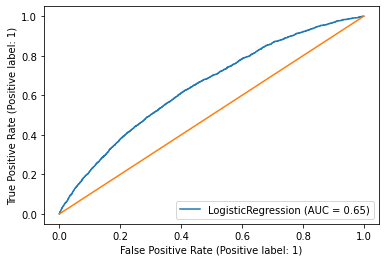

In [40]:
metrics.plot_roc_curve(best_mdl, X_test, y_test)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

The logisitic regression model is not effecient to reject bad loan. It can not be used and we must improve it.
The high score is due to the poor number of true label.

In [41]:
tmp = target.sum() / target.shape[0] *100
tmp2 = target.sum() / (target.shape[0]-target.sum()) *100
print("The proportion of True label is {0:.2f}%. It is {1} time less than False.\n\
New datasets are created with less accepted loan.".format(tmp[0], int(tmp2)))

The proportion of True label is 9.50%. It is 10 time less than False.
New datasets are created with less accepted loan.


## New dataset

The number of rejected loan is low compared to accepted loan. Moreover feature are quite equilibrate beetween 2 labels.
True label are increased with data augmentation (adding noises). To be sure there is no overfitting, an unbiased sample will be used. 

In [42]:
def add_noise(X, shape = None, dispersion = 1):
    """
    Generate new samples and add to data given.
    Samples generated follow distribution center to X's mean
    with X's standard deviation
    Arguments:
        _X array
        _Data dimension (which dimension)
        _dispersion: factor to scale standard deviation
    Return
        Array with new data
    """
    std = np.std(X, axis = 0)/dispersion
    means = np.mean(X, axis = 0)
    if shape is None:
        lines = np.shape(X)[0]
        col = np.shape(X)[1]
        Xnoisy =  np.zeros((lines, col))
    else:
        Xnoisy =  np.zeros((shape[0], shape[1]))
    for i in range(np.shape(X)[1]):
        noise = np.random.normal(loc=means[i], scale=std[i], size = np.shape(Xnoisy)[0])
        ##convert to int for boolen features
        #Xnoisy[:,i] += noise.astype(int)
        Xnoisy[:,i] += noise
    return Xnoisy

In [43]:
def best_score_model(mdl, scores, metric = "f_mesure"):
    tmp = []
    for i in range(len(scores)):
        tmp.append(scores[i][metric])
    indice = np.where(tmp == np.max(tmp))[0][0]
    return mdl[i], scores[i]

# Training and test dataset

In [44]:
def ratio_false_true(Y, label = 1, ratio = 2):
    """
    For binomila data. Split label 1/0
    and return indice in way that 1/0 has a specific ratio.
    Arguments:
        Y: list of binomial data
        label: label to use (default 1)
        ratio: ratio value between number of 0 and number of 1
        number(0)/number(1)
    Return:
        indices of keep elements
    """
    indice_true = np.where(Y == label)[0]
    indice_false = np.setdiff1d(np.arange(len(Y)), indice_true)
    new_indice_false = np.random.choice(indice_false, int(len(indice_true) * ratio), replace = False)
    indices = np.concatenate([indice_true, new_indice_false])
    return np.sort(indices)

### No data augmentation

Create a Test validation by taking off 20% of label True and False

In [45]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

Compare data with no data augmentation vs data augmentation. For both case, ratio **True**/**False** = 2

In [46]:
ind = ratio_false_true(Ytrain, label = 1, ratio = 1)
newXtrain = Xtrain[ind]
newYtrain = Ytrain[ind]

In [47]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    lr = LogisticRegression(C=10, max_iter = 10000).fit(x_train, np.ravel(y_train))
    y_pred = lr.predict(Xtest)
    mdl.append(lr)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

TN: 19598.0, FP: 13732.0, FN: 1305.0, TP: 2194.0
Sensibility (rate of true positif) 0.6270362960845955
Specificity (rate of true negatif) 0.588
Precision (proportion of correct prediction of positif) 0.138
Accurary (proportion of correct prediction) 0.592
F-mesure 0.226

TN: 19630.0, FP: 13700.0, FN: 1331.0, TP: 2168.0
Sensibility (rate of true positif) 0.6196056016004573
Specificity (rate of true negatif) 0.589
Precision (proportion of correct prediction of positif) 0.137
Accurary (proportion of correct prediction) 0.592
F-mesure 0.224

TN: 19702.0, FP: 13628.0, FN: 1337.0, TP: 2162.0
Sensibility (rate of true positif) 0.6178908259502716
Specificity (rate of true negatif) 0.591
Precision (proportion of correct prediction of positif) 0.137
Accurary (proportion of correct prediction) 0.594
F-mesure 0.224

TN: 19669.0, FP: 13661.0, FN: 1309.0, TP: 2190.0
Sensibility (rate of true positif) 0.6258931123178051
Specificity (rate of true negatif) 0.590
Precision (proportion of correct predict

## Data augmentation

In [48]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [49]:
#features with 2 classes
feat = []
for cpt, col in enumerate(data.columns):
    count = data[col].nunique()
    if count == 2:
        feat.append(cpt)

In [50]:
indices_true = np.where(Ytrain == 1)[0]
indices_false = np.arange(0, len(Ytrain))
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)

In [51]:
#create noisy data
lines = np.shape(Xtrain)[0]
col = np.shape(Xtrain)[1]
Xtrain_noise = add_noise(Xtrain[indices_true], shape = [lines, col], dispersion = 1.2)
for col in feat:
    Xtrain_noise[:, col] = Xtrain_noise[:, col].astype(int)

In [52]:
Xnoisy = np.concatenate((Xtrain[indices_true], Xtrain_noise))
Ynoisy_true = np.ones(len(Xnoisy))
Ynoisy_false = np.zeros(len(indices_false))
Ynoisy = np.concatenate((Ynoisy_true, Ynoisy_false))
Xnoisy = np.concatenate((Xnoisy, Xtrain[indices_false]))
ind = np.arange(len(Xnoisy))
np.random.shuffle(ind)
Xnoisy = Xnoisy[ind]
Ynoisy = Ynoisy[ind]

In [53]:
ind = ratio_false_true(Ynoisy, label = 1, ratio = 0.5)
newXtrain = Xnoisy[ind]
newYtrain = Ynoisy[ind]

In [54]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    lr = LogisticRegression(C=10, max_iter = 10000, class_weight='balanced').fit(x_train, np.ravel(y_train))
    y_pred = lr.predict(Xtest)
    mdl.append(lr)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TN: 33323.0, FP: 7.0, FN: 3497.0, TP: 2.0
Sensibility (rate of true positif) 0.0005715918833952558
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.222
Accurary (proportion of correct prediction) 0.905
F-mesure 0.001



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TN: 33321.0, FP: 9.0, FN: 3498.0, TP: 1.0
Sensibility (rate of true positif) 0.0002857959416976279
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.100
Accurary (proportion of correct prediction) 0.905
F-mesure 0.001



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TN: 33324.0, FP: 6.0, FN: 3498.0, TP: 1.0
Sensibility (rate of true positif) 0.0002857959416976279
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.143
Accurary (proportion of correct prediction) 0.905
F-mesure 0.001

TN: 33309.0, FP: 21.0, FN: 3496.0, TP: 3.0
Sensibility (rate of true positif) 0.0008573878250928837
Specificity (rate of true negatif) 0.999
Precision (proportion of correct prediction of positif) 0.125
Accurary (proportion of correct prediction) 0.905
F-mesure 0.002

TN: 33327.0, FP: 3.0, FN: 3498.0, TP: 1.0
Sensibility (rate of true positif) 0.0002857959416976279
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.250
Accurary (proportion of correct prediction) 0.905
F-mesure 0.001

Wall time: 7min 57s


## lightGBM (Light Gradient Boosting Machine)

### LGBMClassifier

In [55]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [56]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
feature_imp = np.zeros(x_train.shape[1])

scores = []
flag = True
for train_index, test_index in skf.split(Xtrain, Ytrain):
    x_train, x_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = Ytrain[train_index], Ytrain[test_index]
    model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')
    model.fit(x_train, y_train, early_stopping_rounds=200, eval_set = [(x_val, y_val)], eval_metric = ['auc', 'loss'], verbose = 200)
    if flag:
        df_feature_importance = pd.DataFrame({ 'feature': data.columns.to_numpy(),
        'importance': model.feature_importances_,})
        flag = False
    else:
        df_feature_importance['importance'] += model.feature_importances_
    y_pred = model.predict(Xtest)
    scores.append(score_regression(Ytest, y_pred, verbose = True))

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.677552	valid_0's binary_logloss: 0.562054
Early stopping, best iteration is:
[130]	valid_0's auc: 0.681104	valid_0's binary_logloss: 0.584883
TN: 23529.0, FP: 9801.0, FN: 1561.0, TP: 1938.0
Sensibility (rate of true positif) 0.5538725350100029
Specificity (rate of true negatif) 0.706
Precision (proportion of correct prediction of positif) 0.165
Accurary (proportion of correct prediction) 0.691
F-mesure 0.254



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.675944	valid_0's binary_logloss: 0.559737
Early stopping, best iteration is:
[57]	valid_0's auc: 0.683853	valid_0's binary_logloss: 0.611239
TN: 22201.0, FP: 11129.0, FN: 1401.0, TP: 2098.0
Sensibility (rate of true positif) 0.5995998856816234
Specificity (rate of true negatif) 0.666
Precision (proportion of correct prediction of positif) 0.159
Accurary (proportion of correct prediction) 0.660
F-mesure 0.251



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.676761	valid_0's binary_logloss: 0.562957
Early stopping, best iteration is:
[101]	valid_0's auc: 0.684257	valid_0's binary_logloss: 0.595661
TN: 23192.0, FP: 10138.0, FN: 1510.0, TP: 1989.0
Sensibility (rate of true positif) 0.5684481280365818
Specificity (rate of true negatif) 0.696
Precision (proportion of correct prediction of positif) 0.164
Accurary (proportion of correct prediction) 0.684
F-mesure 0.255



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.675032	valid_0's binary_logloss: 0.5587
Early stopping, best iteration is:
[65]	valid_0's auc: 0.683928	valid_0's binary_logloss: 0.606732
TN: 22535.0, FP: 10795.0, FN: 1447.0, TP: 2052.0
Sensibility (rate of true positif) 0.5864532723635324
Specificity (rate of true negatif) 0.676
Precision (proportion of correct prediction of positif) 0.160
Accurary (proportion of correct prediction) 0.668
F-mesure 0.251



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.692369	valid_0's binary_logloss: 0.560142
Early stopping, best iteration is:
[80]	valid_0's auc: 0.698541	valid_0's binary_logloss: 0.599739
TN: 22756.0, FP: 10574.0, FN: 1468.0, TP: 2031.0
Sensibility (rate of true positif) 0.5804515575878822
Specificity (rate of true negatif) 0.683
Precision (proportion of correct prediction of positif) 0.161
Accurary (proportion of correct prediction) 0.673
F-mesure 0.252

Wall time: 6.67 s


### Features qui contribuent le plus

In [57]:
df_feature_importance.sort_values('importance', ascending=False)

,feature,importance
47,Number_years_Loan_Theorical,2210
2,AGE,1216
3,YEARS_EMPLOYED,1085
1,AMT_ANNUITY,1028
46,CREDIT_ask,998
32,CREDIT_MEAN_active,951
40,CREDIT_MEAN_closed,900
48,INCOME_ANNUITY_RATIO,833
4,OWN_CAR_AGE,494
0,AMT_INCOME_TOTAL,489


In [58]:
feat = []
tot = df_feature_importance['importance'].sum()
for cpt, val in enumerate(df_feature_importance['importance']):
    if val >= tot * 0.02:
        feat.append(df_feature_importance.iloc[cpt,0])

In [59]:
feat.append("CNT_FAM_MEMBERS")

In [60]:
X = data[feat].copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
feature_imp = np.zeros(x_train.shape[1])

scores = []
mdl = []
flag = True
df_feature_importance
for train_index, test_index in skf.split(Xtrain, Ytrain):
    x_train, x_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = Ytrain[train_index], Ytrain[test_index]
    model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')
    model.fit(x_train, y_train, early_stopping_rounds=200, eval_set = [(x_val, y_val)], eval_metric = ['auc', 'loss'], verbose = 200)
    if flag:
        df_feature_importance = pd.DataFrame({ 'feature': data[feat].columns.to_numpy(),
        'importance': model.feature_importances_,})
        flag = False
    else:
        df_feature_importance['importance'] += model.feature_importances_
    y_pred = model.predict(Xtest)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
    mdl.append(model)

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.657802	valid_0's binary_logloss: 0.573341
Early stopping, best iteration is:
[80]	valid_0's auc: 0.668696	valid_0's binary_logloss: 0.612008
TN: 22386.0, FP: 10944.0, FN: 1541.0, TP: 1958.0
Sensibility (rate of true positif) 0.5595884538439554
Specificity (rate of true negatif) 0.672
Precision (proportion of correct prediction of positif) 0.152
Accurary (proportion of correct prediction) 0.661
F-mesure 0.239

Training until validation scores don't improve for 200 rounds


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[200]	valid_0's auc: 0.662866	valid_0's binary_logloss: 0.568981
Early stopping, best iteration is:
[62]	valid_0's auc: 0.671632	valid_0's binary_logloss: 0.618238
TN: 21943.0, FP: 11387.0, FN: 1538.0, TP: 1961.0
Sensibility (rate of true positif) 0.5604458416690483
Specificity (rate of true negatif) 0.658
Precision (proportion of correct prediction of positif) 0.147
Accurary (proportion of correct prediction) 0.649
F-mesure 0.233

Training until validation scores don't improve for 200 rounds


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[200]	valid_0's auc: 0.659232	valid_0's binary_logloss: 0.573857
Early stopping, best iteration is:
[76]	valid_0's auc: 0.667383	valid_0's binary_logloss: 0.616528
TN: 22280.0, FP: 11050.0, FN: 1529.0, TP: 1970.0
Sensibility (rate of true positif) 0.563018005144327
Specificity (rate of true negatif) 0.668
Precision (proportion of correct prediction of positif) 0.151
Accurary (proportion of correct prediction) 0.658
F-mesure 0.239

Training until validation scores don't improve for 200 rounds


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[200]	valid_0's auc: 0.662385	valid_0's binary_logloss: 0.566598
Early stopping, best iteration is:
[39]	valid_0's auc: 0.672755	valid_0's binary_logloss: 0.628564
TN: 21627.0, FP: 11703.0, FN: 1493.0, TP: 2006.0
Sensibility (rate of true positif) 0.5733066590454415
Specificity (rate of true negatif) 0.649
Precision (proportion of correct prediction of positif) 0.146
Accurary (proportion of correct prediction) 0.642
F-mesure 0.233



C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.676921	valid_0's binary_logloss: 0.568624
Early stopping, best iteration is:
[56]	valid_0's auc: 0.684849	valid_0's binary_logloss: 0.621351
TN: 22001.0, FP: 11329.0, FN: 1514.0, TP: 1985.0
Sensibility (rate of true positif) 0.5673049442697914
Specificity (rate of true negatif) 0.660
Precision (proportion of correct prediction of positif) 0.149
Accurary (proportion of correct prediction) 0.651
F-mesure 0.236



### Feature importance

In [61]:
df_feature_importance.sort_values('importance', ascending=False)

,feature,importance
11,Number_years_Loan_Theorical,2070
2,AGE,933
3,YEARS_EMPLOYED,843
1,AMT_ANNUITY,842
10,CREDIT_ask,774
6,CREDIT_MEAN_active,762
8,CREDIT_MEAN_closed,762
12,INCOME_ANNUITY_RATIO,693
4,OWN_CAR_AGE,405
0,AMT_INCOME_TOTAL,402


In [62]:
df_feature_importance

,feature,importance
0,AMT_INCOME_TOTAL,402
1,AMT_ANNUITY,842
2,AGE,933
3,YEARS_EMPLOYED,843
4,OWN_CAR_AGE,405
5,CREDIT_active,347
6,CREDIT_MEAN_active,762
7,CREDIT_MEAN_OVERDUE_closed,199
8,CREDIT_MEAN_closed,762
9,proportion_OVERDUE_closed,206


In [63]:
val = df[df["TARGET"] == 1]["CNT_FAM_MEMBERS"].value_counts(normalize=True)*100
val.index

Float64Index([2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 13.0, 10.0], dtype='float64')

In [64]:
df[df["TARGET"] == 1]["CNT_FAM_MEMBERS"].unique()

array([ 1.,  2.,  5.,  3.,  4.,  6.,  7., 10., 13.,  8.])

In [65]:
tmp = []
for i in range(len(scores)):
    tmp.append(scores[i]['f_mesure'])

ind = np.where(tmp == np.max(tmp))[0][0]

In [66]:
mdl[ind]

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               n_estimators=10000, objective='binary')

In [75]:
df.sample(n= 50000).to_csv("clean_data2_mini.csv")

In [ ]:
pickle.dump(mdl[ind], open("tree_decision", 'wb'))